In [26]:
# load modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set()
np.set_printoptions(precision=2)
%matplotlib inline

In [27]:
dataset = load_breast_cancer()
print(dataset.DESCR)

cancer = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = cancer.iloc[:, :]

cancer['target'] = dataset.target
y = cancer['target']

cancer.head(2)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


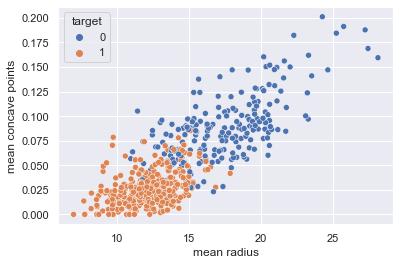

In [28]:
sns.scatterplot('mean radius', 'mean concave points', hue='target', data=cancer)
plt.show()

<b>stratify in train_test_split</b> makes sure that the ratio of division remains the same! If, for example, there is a
50-50% to get 0s and 1s, stratify will ensure to split the data accordingly, preserving the ratio.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, stratify=y)
dtc = DecisionTreeClassifier().fit(X_train, y_train)
test_pred = dtc.predict(X_test)
accuracy_score(y_test, test_pred)

1.0

MSE, RMSE, KFold, cross_val_score



### Ensemble learning - Voting classifier


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


def best_params(clf, x, y, name):
    scaler = StandardScaler()
    if name != 'tree':
        x = scaler.fit_transform(x)
        if name == 'logreg':
            params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'lbfgs', 'saga']}
        else:
            params = {'n_neighbors': [2, 3, 4, 5, 6, 7], 'weights': ['uniform', 'distance']}
    else:
        params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
    return GridSearchCV(clf, param_grid=params, cv=5, refit=True, n_jobs=-1).fit(x, y)

logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

names = ['logreg', 'tree', 'knn']
algos = [logreg, dtc, knn]
for idx, clf in enumerate(algos):
    results = best_params(clf, X_train, y_train, names[idx])
    print(results.best_params_)
    algos[idx] = results

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
{'max_depth': 2}
{'n_neighbors': 4, 'weights': 'uniform'}


c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [1.    nan 1.   1.   0.99 0.99  nan  nan  nan 1.    nan 1.   1.   1.
 1.    nan  nan  nan 1.    nan 1.   1.   1.   1.    nan  nan  nan]
  warnings.warn(


In [31]:
scaler = StandardScaler().fit(X_train)
X_tr_st = scaler.transform(X_train)
X_ts_st = scaler.transform(X_test)

logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear').fit(X_tr_st, y_train)
dtc = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=2, weights='distance').fit(X_tr_st, y_train)

predictions = [logreg.predict(X_ts_st), dtc.predict(X_test), knn.predict(X_ts_st)]
predictions


[array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0

In [32]:
from sklearn.ensemble import VotingClassifier

print(sum(predictions))

[3 0 0 3 3 3 3 0 3 0 3 3 3 0 0 0 3 3 3 0 0 3 0 0 3 3 0 0 3 3 3 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 0 0 3 3 3 0 3 3 0 3 3 2 0 0 3 3 0 3 0 3 3 3
 3 3 0 3 0 3 0 3 3 0 0 3 3 0 1 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 3 0 3 0 3 3 0
 3 3 0 3 3 3 0 0 3 3 0 0 0 0 3 3 3 3 3 3 0 3 0 3 3 0 3 0 3 0 3 0 0 0 3 0 3
 3 3 3 3 0 3 3 0 0 3 0 0 0 0 3 0 3 0 3 3 3 0 3]


In [33]:
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1e5)),
    ('K Nearest Neighbours', KNeighborsClassifier()),
    ('Classification Tree', DecisionTreeClassifier())
]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 1.000
K Nearest Neighbours : 0.959
Classification Tree : 1.000


In [34]:
vc = VotingClassifier(estimators=classifiers, verbose=1)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print(f'Voting classifier: {accuracy_score(y_test, y_pred)}')


[Voting] ...... (1 of 3) Processing Logistic Regression, total=   0.9s
[Voting] ..... (2 of 3) Processing K Nearest Neighbours, total=   0.0s
[Voting] ...... (3 of 3) Processing Classification Tree, total=   0.0s
Voting classifier: 1.0


In [35]:
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(max_depth=2)
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')

classifiers = [
    ('Logistic Regression', logreg),
    ('K Nearest Neighbours', knn),
    ('Classification Tree', dtc)
]

vc = VotingClassifier(classifiers, n_jobs=-1).fit(X_tr_st, y_train)
y_pred = vc.predict(X_ts_st)

print(f'Voting classifier: {accuracy_score(y_test, y_pred)}')



Voting classifier: 1.0


In [36]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=.16)
bagging = BaggingClassifier(dt, 300, n_jobs=-1).fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print(accuracy_score(y_test, y_pred))

1.0


In [37]:
bagging = BaggingClassifier(dt, 300, n_jobs=-1, oob_score=True).fit(X_train, y_train)
y_pred = bagging.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)
print(bagging.oob_score_)





1.0
1.0
